#### Apoptotic Cells Count
#### Nissl 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
nissl_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/MK_Nissl_Count.csv')

In [3]:
nissl_df.columns

Index(['Date', 'Genotype', 'Tx', 'Region', 'Slide', 'Field',
       'Apoptotic_Cells'],
      dtype='object')

In [6]:
nissl_df.groupby(['Genotype', 'Tx', 'Region'])['Date'].count()

Genotype  Tx      Region
KO        1mg     Ctx       27
                  Str       27
          Saline  Ctx       27
                  Str       27
WT        1mg     Ctx       27
                  Str       27
          Saline  Ctx       27
                  Str       27
Name: Date, dtype: int64

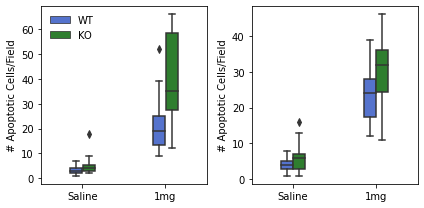

In [8]:
plt.figure(figsize=(6, 3))
ax1 = plt.subplot(121)
sns.boxplot(data = nissl_df[nissl_df['Region'] == 'Ctx'], x = 'Tx', y = 'Apoptotic_Cells', hue = 'Genotype', palette = ['royalblue', 'forestgreen'], hue_order = ['WT', 'KO'], width = 0.3, ax = ax1)
ax1.set_ylabel('# Apoptotic Cells/Field')
ax1.set_xlabel('')
ax1.legend(frameon=False)
ax2 = plt.subplot(122)
sns.boxplot(data = nissl_df[nissl_df['Region'] == 'Str'], x = 'Tx', y = 'Apoptotic_Cells', hue = 'Genotype', palette = ['royalblue', 'forestgreen'], hue_order = ['WT', 'KO'], width = 0.3, ax = ax2)
ax2.set_ylabel('# Apoptotic Cells/Field')
ax2.set_xlabel('')
ax2.legend().remove()
plt.tight_layout()


In [9]:
pg.anova(data = nissl_df[nissl_df['Region'] == 'Ctx'], dv = 'Apoptotic_Cells', between = ['Genotype', 'Tx'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,2660.148148,1,2660.148148,25.900651,1.604451e-06,0.199388
1,Tx,18304.037037,1,18304.037037,178.218074,2.787143e-24,0.631491
2,Genotype * Tx,1841.814815,1,1841.814815,17.932912,4.952945e-05,0.147072
3,Residual,10681.407407,104,102.705840,NaN,NaN,NaN


In [10]:
pg.pairwise_ttests(data = nissl_df[nissl_df['Region'] == 'Ctx'], dv = 'Apoptotic_Cells', between = ['Tx', 'Genotype'], padjust = 'holm')

,Contrast,Tx,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Tx,-,Saline,1mg,False,True,-11.304264,106.0,two-sided,6.455769e-20,NaN,NaN,5.084e+16,-2.160077
1,Genotype,-,WT,KO,False,True,-3.024394,106.0,two-sided,3.125649e-03,NaN,NaN,11.052,-0.577917
2,Tx * Genotype,Saline,WT,KO,False,True,-2.349227,52.0,two-sided,2.264624e-02,0.022646,holm,2.544,-0.630112
3,Tx * Genotype,1mg,WT,KO,False,True,-4.741073,52.0,two-sided,1.691949e-05,0.000034,holm,1046.939,-1.271656


In [11]:
pg.anova(data = nissl_df[nissl_df['Region'] == 'Str'], dv = 'Apoptotic_Cells', between = ['Genotype', 'Tx'])


,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,468.750000,1,468.750000,11.655244,9.137471e-04,0.100776
1,Tx,13668.750000,1,13668.750000,339.866911,1.505553e-34,0.765696
2,Genotype * Tx,168.750000,1,168.750000,4.195888,4.304096e-02,0.038780
3,Residual,4182.666667,104,40.217949,NaN,NaN,NaN


In [12]:
pg.pairwise_ttests(data = nissl_df[nissl_df['Region'] == 'Str'], dv = 'Apoptotic_Cells', between = ['Genotype', 'Tx'], padjust = 'holm')


,Contrast,Genotype,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Genotype,-,WT,KO,False,True,-1.660520,106.0,two-sided,9.976521e-02,NaN,NaN,0.695,-0.317301
1,Tx,-,Saline,1mg,False,True,-17.337493,106.0,two-sided,1.019597e-32,NaN,NaN,1.635e+29,-3.312938
2,Genotype * Tx,WT,Saline,1mg,False,True,-12.159003,52.0,two-sided,7.994240e-17,7.994240e-17,holm,4.337e+13,-3.261301
3,Genotype * Tx,KO,Saline,1mg,False,True,-13.861937,52.0,two-sided,4.251744e-19,8.503488e-19,holm,6.778e+15,-3.718064


In [13]:
out_idx = []
for region in ['Ctx', 'Str']:
    for tx in ['Saline', '1mg']:
        for gen in ['WT', 'KO']:
            outs = pg.madmedianrule(nissl_df[(nissl_df['Region']==region) & (nissl_df['Tx']==tx) & (nissl_df['Genotype']==gen)]['Apoptotic_Cells'])
            idxs = nissl_df[(nissl_df['Region']==region) & (nissl_df['Tx']==tx) & (nissl_df['Genotype']==gen)]['Apoptotic_Cells'][outs]
            out_idx.append(idxs)

In [14]:
nissl_tidy = nissl_df.drop(index= pd.concat(out_idx).index)

In [15]:
nissl_tidy.groupby(['Genotype', 'Tx', 'Region'])['Date'].count()

Genotype  Tx      Region
KO        1mg     Ctx       25
                  Str       26
          Saline  Ctx       23
                  Str       25
WT        1mg     Ctx       24
                  Str       27
          Saline  Ctx       26
                  Str       26
Name: Date, dtype: int64

In [16]:
pg.anova(data = nissl_tidy[nissl_tidy['Region'] == 'Ctx'], dv = 'Apoptotic_Cells', between = ['Genotype', 'Tx'])


,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,2360.335951,1.0,2360.335951,31.105169,2.337563e-07,0.248632
1,Tx,14096.841240,1.0,14096.841240,185.772127,5.471078e-24,0.664012
2,Genotype * Tx,2007.409091,1.0,2007.409091,26.454200,1.468702e-06,0.219620
3,Residual,7132.948835,94.0,75.882434,NaN,NaN,NaN


In [17]:
nissl_tidy['Group'] = nissl_tidy['Genotype'] + '_' + nissl_tidy['Tx']

In [18]:
pg.pairwise_tukey(data = nissl_tidy[nissl_tidy['Region'] == 'Ctx'], dv = 'Apoptotic_Cells', between = 'Group')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,KO_1mg,KO_Saline,37.080000,3.826087,33.253913,2.516850,two-sided,13.212513,0.001,3.754858
1,KO_1mg,WT_1mg,37.080000,18.208333,18.871667,2.489391,two-sided,7.580838,0.001,2.131650
2,KO_1mg,WT_Saline,37.080000,3.076923,34.003077,2.440052,two-sided,13.935392,0.001,3.843388
3,KO_Saline,WT_1mg,3.826087,18.208333,-14.382246,2.541851,two-sided,-5.658179,0.001,-1.623363
4,KO_Saline,WT_Saline,3.826087,3.076923,0.749164,2.493550,two-sided,0.300441,0.900,0.084622
5,WT_1mg,WT_Saline,18.208333,3.076923,15.131410,2.465831,two-sided,6.136434,0.001,1.709753


In [19]:
pg.anova(data = nissl_tidy[nissl_tidy['Region'] == 'Str'], dv = 'Apoptotic_Cells', between = ['Genotype', 'Tx'])


,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,489.105607,1.0,489.105607,13.615019,3.653490e-04,0.119835
1,Tx,14035.975751,1.0,14035.975751,390.713333,2.557780e-36,0.796215
2,Genotype * Tx,258.493998,1.0,258.493998,7.195585,8.552186e-03,0.067126
3,Residual,3592.397436,100.0,35.923974,NaN,NaN,NaN


In [20]:
pg.pairwise_tukey(data = nissl_tidy[nissl_tidy['Region'] == 'Str'], dv = 'Apoptotic_Cells', between = 'Group')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,KO_1mg,KO_Saline,31.653846,5.200000,26.453846,1.678884,two-sided,15.756807,0.001,4.345735
1,KO_1mg,WT_1mg,31.653846,24.222222,7.431624,1.646879,two-sided,4.512551,0.001,1.221590
2,KO_1mg,WT_Saline,31.653846,4.076923,27.576923,1.662343,two-sided,16.589194,0.001,4.531653
3,KO_Saline,WT_1mg,5.200000,24.222222,-19.022222,1.663573,two-sided,-11.434555,0.001,-3.125878
4,KO_Saline,WT_Saline,5.200000,4.076923,1.123077,1.678884,two-sided,0.668943,0.900,0.184495
5,WT_1mg,WT_Saline,24.222222,4.076923,20.145299,1.646879,two-sided,12.232413,0.001,3.311429


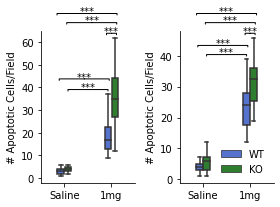

In [29]:
nissl_fig = plt.figure(figsize=(4, 3))
ax1 = plt.subplot(121)
sns.boxplot(data = nissl_tidy[nissl_tidy['Region'] == 'Ctx'], x = 'Tx', y = 'Apoptotic_Cells', hue = 'Genotype', palette = ['royalblue', 'forestgreen'], hue_order = ['WT', 'KO'], width = 0.3, ax = ax1)
ax1.set_ylabel('# Apoptotic Cells/Field')
ax1.set_xlabel('')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend().remove()
ax1.annotate(s='***', xy=(0.75, 0.97), xycoords='axes fraction', xytext=(0, 1), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.5, lengthB=.15', lw=1, color='k'), fontsize = 10)
ax1.annotate(s='***', xy=(0.46, 0.67), xycoords='axes fraction', xytext=(0, 1), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.5, lengthB=.15', lw=1, color='k'), fontsize = 10)
ax1.annotate(s='***', xy=(0.5, 0.6), xycoords='axes fraction', xytext=(0, 1), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.15', lw=1, color='k'), fontsize = 10)
ax1.annotate(s='***', xy=(0.54, 1.04), xycoords='axes fraction', xytext=(0, 1), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.5, lengthB=.15', lw=1, color='k'), fontsize = 10)
ax1.annotate(s='***', xy=(0.49, 1.1), xycoords='axes fraction', xytext=(0, 1), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=3, lengthB=.15', lw=1, color='k'), fontsize = 10)


ax2 = plt.subplot(122)
sns.boxplot(data = nissl_tidy[nissl_tidy['Region'] == 'Str'], x = 'Tx', y = 'Apoptotic_Cells', hue = 'Genotype', palette = ['royalblue', 'forestgreen'], hue_order = ['WT', 'KO'], width = 0.3, ax = ax2)
ax2.set_ylabel('# Apoptotic Cells/Field')
ax2.set_xlabel('')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(frameon = False, loc = 4)
ax2.annotate(s='***', xy=(0.75, 0.97), xycoords='axes fraction', xytext=(0, 1), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.5, lengthB=.15', lw=1, color='k'), fontsize = 10)
ax2.annotate(s='***', xy=(0.46, 0.89), xycoords='axes fraction', xytext=(0, 1), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.5, lengthB=.15', lw=1, color='k'), fontsize = 10)
ax2.annotate(s='***', xy=(0.5, 0.83), xycoords='axes fraction', xytext=(0, 1), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.15', lw=1, color='k'), fontsize = 10)
ax2.annotate(s='***', xy=(0.54, 1.04), xycoords='axes fraction', xytext=(0, 1), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.5, lengthB=.15', lw=1, color='k'), fontsize = 10)
ax2.annotate(s='***', xy=(0.5, 1.1), xycoords='axes fraction', xytext=(0, 1), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=3, lengthB=.15', lw=1, color='k'), fontsize = 10)

plt.tight_layout()


In [30]:
nissl_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Nissl_count.svg')

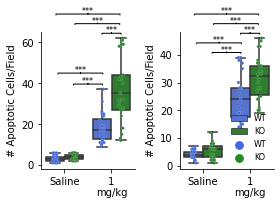

In [33]:
nissl_paper = plt.figure(figsize=(4, 3))
ax1 = plt.subplot(121)
sns.boxplot(data = nissl_tidy[nissl_tidy['Region'] == 'Ctx'], x = 'Tx', y = 'Apoptotic_Cells', hue = 'Genotype', palette = ['royalblue', 'forestgreen'], hue_order = ['WT', 'KO'], ax = ax1, showfliers = False)
sns.stripplot(data = nissl_tidy[nissl_tidy['Region'] == 'Ctx'], x = 'Tx', y = 'Apoptotic_Cells', hue = 'Genotype', palette = ['royalblue', 'forestgreen'], hue_order = ['WT', 'KO'], dodge = True, edgecolor = 'silver', size = 3, linewidth = 0.2, ax = ax1)
ax1.set_ylabel('# Apoptotic Cells/Field')
ax1.set_xlabel('')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend().remove()
ax1.set_xticklabels(['Saline', '1\nmg/kg'])
ax1.annotate(s='***', xy=(0.75, 0.99), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.2, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='***', xy=(0.42, 0.7), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.8, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='***', xy=(0.5, 0.62), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.8, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='***', xy=(0.6, 1.06), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.8, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='***', xy=(0.5, 1.13), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=4, lengthB=.12', lw=1, color='k'), fontsize = 8)


ax2 = plt.subplot(122)
sns.boxplot(data = nissl_tidy[nissl_tidy['Region'] == 'Str'], x = 'Tx', y = 'Apoptotic_Cells', hue = 'Genotype', palette = ['royalblue', 'forestgreen'], hue_order = ['WT', 'KO'], ax = ax2, showfliers = False)
sns.stripplot(data = nissl_tidy[nissl_tidy['Region'] == 'Str'], x = 'Tx', y = 'Apoptotic_Cells', hue = 'Genotype', palette = ['royalblue', 'forestgreen'], hue_order = ['WT', 'KO'], dodge = True, edgecolor = 'silver', size = 3, linewidth = 0.2, ax = ax2)
ax2.set_ylabel('# Apoptotic Cells/Field')
ax2.set_xlabel('')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(frameon = False, loc = 4, fontsize = 8)
ax2.set_xticklabels(['Saline', '1\nmg/kg'])
ax2.annotate(s='***', xy=(0.75, 0.99), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.2, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax2.annotate(s='***', xy=(0.42, 0.92), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.8, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax2.annotate(s='***', xy=(0.5, 0.85), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.8, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax2.annotate(s='***', xy=(0.6, 1.06), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.8, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax2.annotate(s='***', xy=(0.5, 1.13), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=4, lengthB=.12', lw=1, color='k'), fontsize = 8)

plt.tight_layout()

In [34]:
nissl_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Nissl_paper.svg')

### Passive Avoidance

#### Analysis of Passive Avoidance Task

In [36]:
pass_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/pass_av.csv')

In [37]:
pass_df['Phase'].unique()

array(['Shock', 'T1', 'T2'], dtype=object)

In [38]:
pass_df.groupby(['Phase', 'Genotype', 'Group', 'Dose'])['Sub'].count()

Phase  Genotype  Group   Dose
Shock  KO        MK_0.5  0.5     11
                 Sal     1.0     10
       WT        MK_0.5  0.5      8
                 MK_1    1.0     11
                 Sal     1.0     10
T1     KO        MK_0.5  0.5     11
                 Sal     1.0     10
       WT        MK_0.5  0.5      8
                 MK_1    1.0     11
                 Sal     1.0     10
T2     KO        MK_0.5  0.5     11
                 Sal     1.0     10
       WT        MK_0.5  0.5      8
                 MK_1    1.0     11
                 Sal     1.0     10
Name: Sub, dtype: int64

In [39]:
pass_df['Grp'] = pass_df['Genotype'] + '_' + pass_df['Group']

In [40]:
pass_df['Group'].unique()

array(['MK_0.5', 'Sal', 'MK_1'], dtype=object)

In [41]:
for grp in pass_df['Grp'].unique():
    for phase in pass_df['Phase'].unique():
        print(grp+phase+':')
        print(pg.normality(pass_df[(pass_df['Grp']==grp)&(pass_df['Phase']==phase)]['Lat']))

KO_MK_0.5Shock:
            W      pval  normal
Lat  0.609389  0.000033   False
KO_MK_0.5T1:
           W      pval  normal
Lat  0.71326  0.000693   False
KO_MK_0.5T2:
            W      pval  normal
Lat  0.870222  0.078032    True
KO_SalShock:
            W      pval  normal
Lat  0.467503  0.000002   False
KO_SalT1:
            W      pval  normal
Lat  0.728319  0.001944   False
KO_SalT2:
           W      pval  normal
Lat  0.80929  0.018798   False
WT_MK_1Shock:
            W      pval  normal
Lat  0.690688  0.000355   False
WT_MK_1T1:
            W      pval  normal
Lat  0.775385  0.004466   False
WT_MK_1T2:
            W      pval  normal
Lat  0.816783  0.015645   False
WT_MK_0.5Shock:
            W      pval  normal
Lat  0.748404  0.007843   False
WT_MK_0.5T1:
            W      pval  normal
Lat  0.465533  0.000004   False
WT_MK_0.5T2:
            W      pval  normal
Lat  0.874959  0.168436    True
WT_SalShock:
            W     pval  normal
Lat  0.535469  0.00001   False
WT_SalT1

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Text(0, 0.3, '*')

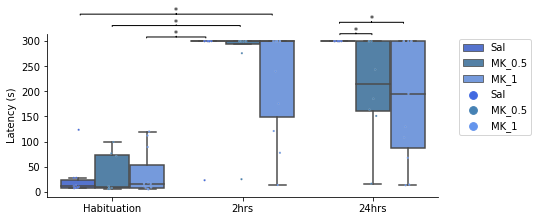

In [249]:
plt.figure(figsize = (7, 3))
ax1 = plt.subplot(111)
sns.boxplot(data = pass_df[pass_df['Genotype']=='WT'], x = 'Phase', y = 'Lat', hue = 'Group', order = ['Shock', 'T1', 'T2'], hue_order = ['Sal', 'MK_0.5', 'MK_1'], palette = ['royalblue', 'steelblue', 'cornflowerblue'], showfliers=False, dodge=True, ax = ax1)
sns.stripplot(data = pass_df[pass_df['Genotype']=='WT'], x = 'Phase', y = 'Lat', hue = 'Group', order = ['Shock', 'T1', 'T2'], hue_order = ['Sal', 'MK_0.5', 'MK_1'], palette = ['royalblue', 'steelblue', 'cornflowerblue'], dodge=True, edgecolor = 'silver', size=2, linewidth = 0.2, ax = ax1)
sns.despine()
ax1.set_xticklabels(labels=['Habituation', '2hrs', '24hrs'])
ax1.legend(ncol = 3)
ax1.set_xlabel('')
ax1.set_ylabel('Latency (s)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax1.annotate(s='*', xy=(0.33, 0.98), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=3.7, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.33, 1.05), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=8, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.33, 1.12), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=12, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.79, 1), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.83, 1.07), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=4, lengthB=.12', lw=1, color='k'), fontsize = 8)



In [42]:
pg.mixed_anova(data = pass_df[(pass_df['Genotype']=='WT') & (pass_df['Phase']!='T2')], dv = 'Lat', between = 'Group', within = 'Phase', subject = 'Sub')


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,5300.629128,2,26,2650.314564,0.384100,6.848639e-01,0.028698,NaN
1,Phase,686813.077243,1,26,686813.077243,160.696299,1.230993e-12,0.860736,1.0
2,Interaction,11374.014991,2,26,5687.007495,1.330611,2.817230e-01,0.092851,NaN


In [47]:
pg.pairwise_ttests(data = pass_df[pass_df['Genotype']=='WT'], dv = 'Lat', between = 'Group', within = 'Phase', subject= 'Sub', parametric = False, padjust = 'fdr_bh')


,Contrast,Phase,A,B,Paired,Parametric,U-val,W-val,Tail,p-unc,p-corr,p-adjust,hedges
0,Phase,-,Shock,T1,True,False,NaN,1.0,two-sided,0.000003,0.000005,fdr_bh,-2.898923
1,Phase,-,Shock,T2,True,False,NaN,1.0,two-sided,0.000003,0.000005,fdr_bh,-2.520374
2,Phase,-,T1,T2,True,False,NaN,26.0,two-sided,0.326800,0.326800,fdr_bh,0.192897
3,Group,-,MK_1,MK_0.5,False,False,40.0,NaN,two-sided,0.772579,0.772579,fdr_bh,-0.281687
4,Group,-,MK_1,Sal,False,False,36.0,NaN,two-sided,0.192667,0.578000,fdr_bh,-0.803881
5,Group,-,MK_0.5,Sal,False,False,30.0,NaN,two-sided,0.398615,0.597923,fdr_bh,-0.619285
6,Phase * Group,Shock,MK_1,MK_0.5,False,False,52.0,NaN,two-sided,0.535724,0.807402,fdr_bh,0.037666
7,Phase * Group,Shock,MK_1,Sal,False,False,60.0,NaN,two-sided,0.751334,0.824212,fdr_bh,0.300534
8,Phase * Group,Shock,MK_0.5,Sal,False,False,37.0,NaN,two-sided,0.824212,0.824212,fdr_bh,0.284969
9,Phase * Group,T1,MK_1,MK_0.5,False,False,34.0,NaN,two-sided,0.364767,0.807402,fdr_bh,-0.390976


In [198]:
adq_dic = {'Group':[], 'Phase_1':[], 'Phase_2':[], 'W':[], 'p_unc':[], 'p_cor':[], 'CLES':[]}

In [199]:
for group in pass_df[pass_df['Genotype']=='WT']['Group'].unique():
    adq_dic['Group'].append(group)
    adq_dic['Phase_1'].append('Hab')
    adq_dic['Phase_2'].append('2hrs')
    wlcx = pg.wilcoxon(pass_df[(pass_df['Genotype']=='WT')&(pass_df['Group']==group)&(pass_df['Phase']=='Shock')]['Lat'].values, pass_df[(pass_df['Genotype']=='WT')&(pass_df['Group']==group)&(pass_df['Phase']=='T1')]['Lat'].values)
    adq_dic['W'].append(wlcx['W-val'].values.item())
    adq_dic['p_unc'].append(wlcx['p-val'].values.item())
    adq_dic['CLES'].append(wlcx['CLES'].values.item())
    

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [200]:
adq_dic

{'Group': ['MK_1', 'MK_0.5', 'Sal'],
 'Phase_1': ['Hab', 'Hab', 'Hab'],
 'Phase_2': ['2hrs', '2hrs', '2hrs'],
 'W': [1.0, 0.0, 0.0],
 'p_unc': [0.005099322378997383, 0.014266186701446923, 0.005921537024148708],
 'p_cor': [],
 'CLES': [0.0743801652892562, 0.046875, 0.03]}

In [201]:
[bol, p_cor] = pg.multicomp(adq_dic['p_unc'])

In [202]:
adq_dic['p_cor'] = p_cor

In [203]:
pd.DataFrame(adq_dic)

,Group,Phase_1,Phase_2,W,p_unc,p_cor,CLES
0,MK_1,Hab,2hrs,1.0,0.005099,0.015298,0.074380
1,MK_0.5,Hab,2hrs,0.0,0.014266,0.015298,0.046875
2,Sal,Hab,2hrs,0.0,0.005922,0.015298,0.030000


In [279]:
pg.kruskal(data = pass_df[(pass_df['Genotype']=='WT') & (pass_df['Phase']=='T2')], dv = 'Lat', between = 'Group')

,Source,ddof1,H,p-unc
Kruskal,Group,2,8.392496,0.015052


In [208]:
pg.pairwise_ttests(data = pass_df[(pass_df['Genotype']=='WT') & (pass_df['Phase']=='T2')], dv = 'Lat', between = 'Group', subject= 'Sub', parametric = False, padjust = 'holm', effsize='CLES')


,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,p-corr,p-adjust,CLES
0,Group,MK_1,MK_0.5,False,False,39.5,two-sided,0.731467,0.731467,holm,0.448864
1,Group,MK_1,Sal,False,False,25.0,two-sided,0.009212,0.018425,holm,0.227273
2,Group,MK_0.5,Sal,False,False,15.0,two-sided,0.005869,0.017608,holm,0.187500


Text(0, 0.3, '*')

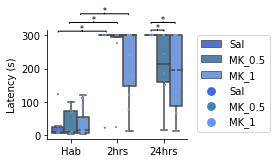

In [283]:
wt_pass_fig = plt.figure(figsize = (2.5, 2))
ax1 = plt.subplot(111)
sns.boxplot(data = pass_df[pass_df['Genotype']=='WT'], x = 'Phase', y = 'Lat', hue = 'Group', order = ['Shock', 'T1', 'T2'], hue_order = ['Sal', 'MK_0.5', 'MK_1'], palette = ['royalblue', 'steelblue', 'cornflowerblue'], showfliers=False, dodge=True, ax = ax1)
sns.stripplot(data = pass_df[pass_df['Genotype']=='WT'], x = 'Phase', y = 'Lat', hue = 'Group', order = ['Shock', 'T1', 'T2'], hue_order = ['Sal', 'MK_0.5', 'MK_1'], palette = ['royalblue', 'steelblue', 'cornflowerblue'], dodge=True, edgecolor = 'silver', size=2, linewidth = 0.2, ax = ax1)
sns.despine()
ax1.set_xticklabels(labels=['Hab', '2hrs', '24hrs'])
ax1.legend(ncol = 3)
ax1.set_xlabel('')
ax1.set_ylabel('Latency (s)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax1.annotate(s='*', xy=(0.25, 0.99), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=3, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.33, 1.07), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=3, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.41, 1.15), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=3, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.79, 1), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.8, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.83, 1.07), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=.12', lw=1, color='k'), fontsize = 8)



In [284]:
wt_pass_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/wt_pass_paper.svg')

Text(0, 0.3, '*')

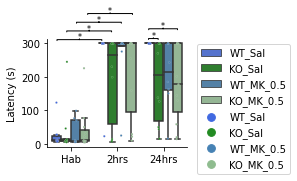

In [310]:
all_pass_fig= plt.figure(figsize = (2.5, 2))
ax1 = plt.subplot(111)
sns.boxplot(data = pass_df[pass_df['Group']!='MK_1'], x = 'Phase', y = 'Lat', hue = 'Grp', order = ['Shock', 'T1', 'T2'], hue_order = ['WT_Sal', 'KO_Sal', 'WT_MK_0.5', 'KO_MK_0.5'], palette = ['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], showfliers=False, dodge =True, ax = ax1)
sns.stripplot(data = pass_df[pass_df['Group']!='MK_1'], x = 'Phase', y = 'Lat', hue = 'Grp', order = ['Shock', 'T1', 'T2'], hue_order = ['WT_Sal', 'KO_Sal', 'WT_MK_0.5', 'KO_MK_0.5'], palette = ['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge =True, edgecolor='silver', size=2, linewidth=0.2, ax = ax1)
sns.despine()
ax1.set_xticklabels(labels=['Hab', '2hrs', '24hrs'])
ax1.legend(ncol = 3)
ax1.set_xlabel('')
ax1.set_ylabel('Latency (s)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax1.annotate(s='*', xy=(0.23, 0.99), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.8, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.3, 1.07), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.8, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.37, 1.15), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.8, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.45, 1.23), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.8, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.76, 1), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.6, lengthB=.12', lw=1, color='k'), fontsize = 8)
ax1.annotate(s='*', xy=(0.83, 1.09), xycoords='axes fraction', xytext=(0, 0.3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.8, lengthB=.12', lw=1, color='k'), fontsize = 8)



In [311]:
all_pass_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/all_pass_paper.svg')

In [265]:
pg.mixed_anova(data = pass_df[(pass_df['Group']!='MK_1') &(pass_df['Phase']!='T2')], dv = 'Lat', between = 'Grp', within = 'Phase', subject = 'Sub')


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Grp,16152.203381,3,35,5384.067794,0.531022,6.639818e-01,0.043535,NaN
1,Phase,762730.659601,1,35,762730.659601,125.119113,4.174191e-13,0.781413,1.0
2,Interaction,28891.243598,3,35,9630.414533,1.579783,2.116789e-01,0.119261,NaN


In [271]:
adq_all_dic = {'Group':[], 'Phase_1':[], 'Phase_2':[], 'W':[], 'p_unc':[], 'p_cor':[], 'CLES':[]}
for group in pass_df[pass_df['Group']!='MK_1']['Grp'].unique():
    adq_all_dic['Group'].append(group)
    adq_all_dic['Phase_1'].append('Hab')
    adq_all_dic['Phase_2'].append('2hrs')
    wlcx = pg.wilcoxon(pass_df[(pass_df['Group']!='MK_1')&(pass_df['Grp']==group)&(pass_df['Phase']=='Shock')]['Lat'].values, pass_df[(pass_df['Group']!='MK_1')&(pass_df['Grp']==group)&(pass_df['Phase']=='T1')]['Lat'].values)
    adq_all_dic['W'].append(wlcx['W-val'].values.item())
    adq_all_dic['p_unc'].append(wlcx['p-val'].values.item())
    adq_all_dic['CLES'].append(wlcx['CLES'].values.item())

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [272]:
adq_all_dic

{'Group': ['KO_MK_0.5', 'KO_Sal', 'WT_MK_0.5', 'WT_Sal'],
 'Phase_1': ['Hab', 'Hab', 'Hab', 'Hab'],
 'Phase_2': ['2hrs', '2hrs', '2hrs', '2hrs'],
 'W': [0.0, 3.0, 0.0, 0.0],
 'p_unc': [0.0038572928299425335,
  0.014432823938841786,
  0.014266186701446923,
  0.005921537024148708],
 'p_cor': [],
 'CLES': [0.1322314049586777, 0.16, 0.046875, 0.03]}

In [273]:
[bol, p_cor] = pg.multicomp(adq_all_dic['p_unc'])

In [274]:
adq_all_dic['p_cor'] = p_cor

In [275]:
pd.DataFrame(adq_all_dic)

,Group,Phase_1,Phase_2,W,p_unc,p_cor,CLES
0,KO_MK_0.5,Hab,2hrs,0.0,0.003857,0.015429,0.132231
1,KO_Sal,Hab,2hrs,3.0,0.014433,0.028532,0.160000
2,WT_MK_0.5,Hab,2hrs,0.0,0.014266,0.028532,0.046875
3,WT_Sal,Hab,2hrs,0.0,0.005922,0.017765,0.030000


In [278]:
pg.kruskal(data = pass_df[(pass_df['Group']!='MK_1') & (pass_df['Phase']=='T2')], dv = 'Lat', between = 'Grp')

,Source,ddof1,H,p-unc
Kruskal,Grp,3,10.151455,0.017322


In [277]:
pg.pairwise_ttests(data = pass_df[(pass_df['Group']!='MK_1') & (pass_df['Phase']=='T2')], dv = 'Lat', between = 'Grp', subject = 'Sub', padjust = 'holm')


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Grp,KO_MK_0.5,KO_Sal,False,True,-0.146222,18.498775,two-sided,0.885328,1.000000,holm,0.394,-0.061532
1,Grp,KO_MK_0.5,WT_MK_0.5,False,True,-0.617080,16.317322,two-sided,0.545697,1.000000,holm,0.465,-0.267852
2,Grp,KO_MK_0.5,WT_Sal,False,True,-3.584234,10.000000,two-sided,0.004977,0.029859,holm,17.603,-1.430039
3,Grp,KO_Sal,WT_MK_0.5,False,True,-0.437797,15.976719,two-sided,0.667395,1.000000,holm,0.442,-0.193250
4,Grp,KO_Sal,WT_Sal,False,True,-3.007655,18.000000,two-sided,0.007559,0.037793,holm,6.365,-1.288231
5,Grp,WT_MK_0.5,WT_Sal,False,True,-2.634171,7.000000,two-sided,0.033708,0.134831,holm,3.423,-1.340975
